## S06-L002 - metoda groupby()

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import time

In [3]:
df = pd.read_csv('course-files/marathon_results_2016.csv', index_col='Bib', \
                 usecols=['Bib','40K','Half','Pace','Age','M/F','Country','State','City'])
df['40K'] = df['40K'].apply(pd.to_timedelta)
df['Half'] = df['Half'].apply(pd.to_timedelta)
df['TotalSeconds'] = df['40K'].apply(lambda x: timedelta.total_seconds(x))
df['HalfSeconds'] = df['Half'].apply(lambda x: timedelta.total_seconds(x))

In [3]:
group_city = df.groupby(by='City')

In [4]:
group_city.groups

{'0851 Oslo': Index(['6229'], dtype='object', name='Bib'),
 '20832': Index(['4186'], dtype='object', name='Bib'),
 '34-120 Andrychow': Index(['31786', '31807'], dtype='object', name='Bib'),
 '5700 Svendborg': Index(['15350'], dtype='object', name='Bib'),
 '95630': Index(['20668'], dtype='object', name='Bib'),
 'APO': Index(['28408'], dtype='object', name='Bib'),
 'Aabyhoj': Index(['21774'], dtype='object', name='Bib'),
 'Aalborg': Index(['30604'], dtype='object', name='Bib'),
 'Aarhus C': Index(['30621'], dtype='object', name='Bib'),
 'Abbotsford': Index(['8196', '19207', '12186'], dtype='object', name='Bib'),
 'Aberdeen': Index(['139', '15329', '7175', '12009', '14503', '16355', '14394'], dtype='object', name='Bib'),
 'Aberdeen City': Index(['31481'], dtype='object', name='Bib'),
 'Aberdeenshire': Index(['31475', '20519'], dtype='object', name='Bib'),
 'Abilene': Index(['16342', '18549', '25534'], dtype='object', name='Bib'),
 'Abingdon': Index(['5764', '928', '8182', '3792'], dtype='

In [6]:
group_city.size()

City
0851 Oslo           1
20832               1
34-120 Andrychow    2
5700 Svendborg      1
95630               1
                   ..
Zurich              7
Zweibruecken        5
Zwevegem            1
Zwolle              1
hingham             1
Length: 5832, dtype: int64

In [7]:
len(group_city)

5832

In [9]:
group_city.get_group('San Francisco').head()

,Age,M/F,City,State,Country,Half,40K,Pace,TotalSeconds,HalfSeconds
Bib,,,,,,,,,,
796,28,M,San Francisco,CA,USA,01:18:12,02:29:21,0:06:02,8961.0,4692.0
36,30,M,San Francisco,CA,USA,01:14:21,02:30:00,0:06:05,9000.0,4461.0
1267,27,M,San Francisco,CA,USA,01:19:24,02:33:24,0:06:11,9204.0,4764.0
644,51,M,San Francisco,CA,USA,01:19:29,02:37:08,0:06:22,9428.0,4769.0
827,33,M,San Francisco,CA,USA,01:18:52,02:38:13,0:06:24,9493.0,4732.0


In [10]:
group_city.get_group('34-120 Andrychow').head()

,Age,M/F,City,State,Country,Half,40K,Pace,TotalSeconds,HalfSeconds
Bib,,,,,,,,,,
31786,44,F,34-120 Andrychow,NaN,POL,01:58:39,03:55:09,0:09:28,14109.0,7119.0
31807,43,M,34-120 Andrychow,NaN,POL,01:44:40,03:55:13,0:09:30,14113.0,6280.0


In [11]:
group_city.first()

,Age,M/F,State,Country,Half,40K,Pace,TotalSeconds,HalfSeconds
City,,,,,,,,,
0851 Oslo,39,F,NaN,NOR,01:35:31,03:15:24,0:07:55,11724.0,5731.0
20832,35,M,MD,USA,01:35:57,03:14:00,0:07:51,11640.0,5757.0
34-120 Andrychow,44,F,NaN,POL,01:58:39,03:55:09,0:09:28,14109.0,7119.0
5700 Svendborg,58,M,NaN,DEN,01:49:12,03:44:58,0:09:05,13498.0,6552.0
95630,46,F,CA,USA,01:50:25,03:37:23,0:08:44,13043.0,6625.0
...,...,...,...,...,...,...,...,...,...
Zurich,42,M,NaN,SUI,01:32:09,03:03:15,0:07:26,10995.0,5529.0
Zweibruecken,58,F,NaN,GER,02:22:22,04:56:52,0:11:57,17812.0,8542.0
Zwevegem,61,M,NaN,BEL,02:15:30,04:42:02,0:11:18,16922.0,8130.0


In [19]:
group_city.get_group('San Francisco')['40K'].mean()

Timedelta('0 days 03:25:35.335025')

In [20]:
group_city.get_group('34-120 Andrychow')['40K'].mean()

Timedelta('0 days 03:55:11')

In [12]:
group_age = df.groupby('Age')

In [16]:
group_age.get_group(20)['40K'].mean()

Timedelta('0 days 03:36:54.583333')

In [17]:
group_age.get_group(40)['40K'].mean()

Timedelta('0 days 03:35:22.724557')

In [18]:
group_age.first()

,M/F,City,State,Country,Half,40K,Pace,TotalSeconds,HalfSeconds
Age,,,,,,,,,
18,M,Needham,MA,USA,01:22:35,02:38:30,0:06:23,9510.0,4955.0
19,M,Plainfield,IL,USA,01:25:28,02:42:30,0:06:33,9750.0,5128.0
20,M,Addis Ababa,MI,ETH,01:06:45,02:14:23,0:05:26,8063.0,4005.0
21,M,Addis Ababa,MA,ETH,01:06:45,02:05:59,0:05:04,7559.0,4005.0
22,M,Eugene,OR,USA,01:13:53,02:24:35,0:05:52,8675.0,4433.0
...,...,...,...,...,...,...,...,...,...
78,M,Tokyo,NS,JPN,01:57:20,03:46:42,0:09:08,13602.0,7040.0
79,M,Jermyn,PA,USA,01:59:31,03:52:17,0:09:21,13937.0,7171.0
80,M,Vancouver,BC,CAN,02:06:13,04:17:22,0:10:23,15442.0,7573.0


In [4]:
agvTotalSeconds = df.pivot_table(index='Country', values='TotalSeconds').sort_values('TotalSeconds')

In [5]:
agvTotalSeconds.head()

,TotalSeconds
Country,
ZIM,7908.000000
UGA,8073.000000
KEN,8109.125000
ETH,8499.928571
LAT,9182.000000


In [2]:
import matplotlib.pyplot as plt

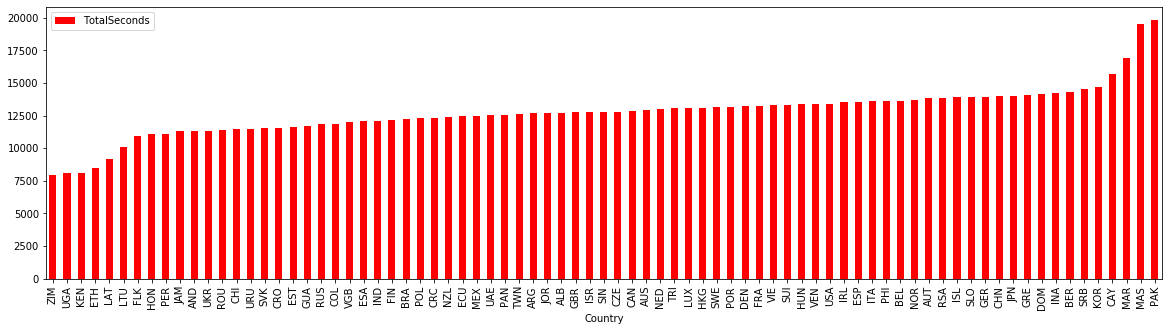

In [24]:
agvTotalSeconds.plot(kind='bar',y='TotalSeconds',color='red', figsize=(20,5))
plt.show()